# Funciones, Excepciones, Manejo de las mismas y Funciones de orden Superior

1. Dominar el concepto y la estructura de las funciones en Python, incluyendo las funciones incorporadas y el manejo del ámbito de las variables. Aprender sobre la recursividad, los pasajes de parámetros y la creación de funciones Lambda. 

2. Entender el manejo de excepciones en Python, incluyendo una introducción a las excepciones y cómo gestionarlas de manera efectiva en programas Python.

3. Explorar las funciones de orden superior en Python, comprendiendo cómo utilizar funciones como argumentos y aprender sobre las funciones de map, filter y reduce para manipular colecciones de datos de manera eficiente.

## Funciones

- **¿Que son?** bloque de líneas de código o un conjunto de instrucciones cuya finalidad es realizar **una tarea específica**. Puede reutilizarse cada vez que lo necesitemos para repetir dicha tarea.
- Si la función hace 2 o más cosas, probablemente podamos refactorizarla en 2 o más funciones distintas. 
- Respetar la regla de una sola funcionalidad por función va a hacer mantenible y escalable nuestro código

**Restricciones:**

1. Los nombres no pueden comenzar con dígitos

2. No se puede utilizar una palabra reservada

3. Las variables deben tener diferentes nombres

4. Los nombres de las funciones deben ser descriptivas de lo que hacen las funciones

5. Los parámetros pueden tener valores por defecto

6. Una función puede devolver ninguno, uno o más de un valor, y de diferentes tipos de datos

7. Las variables de las funciones tienen un alcance o scope extensible solo al ambito de la función. No pueden ser usadas fuera de la misma. 

In [43]:
nombre = input("Ingrese su nombre: ")
edad = int(input("Ingrese su edad: "))
profesion = input("Ingrese su profesión: ")
hobby = input("Ingrese su hobby: ")
mascota = input("Ingrese su mascota: ")

In [44]:
def solicitar_datos(nombre_dato="nombre completo"):
    dato = input(f"ingrese su {nombre_dato}: ")
    try:
        dato = int(dato)
    except Exception as e:
        # print(e)
        return dato
    else:
        return dato 

In [45]:
# Programa que solicita información por pantalla al usuario y luego la imprime:

nombre = solicitar_datos()
edad = solicitar_datos("edad")
profesion = solicitar_datos("profesion")
hobby = solicitar_datos("principal hobbie")
mascota = solicitar_datos("nombre de su mascota")

print(nombre)
print(edad)
print(profesion)
print(hobby)
print(mascota)

print(type(nombre))
print(type(edad))
print(type(profesion))
print(type(hobby))
print(type(mascota))


adfasd
adfasd
asdf
asdf
adf
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [46]:
# ¿Puedo acceder a la variable nombre? ¿Y a la variable dato? ¿Por que se da este comportamiento? 
nombre

'adfasd'

In [47]:
dato # No puedo acceder porque la misma vive dentro de la función y no en el scope global del programa

NameError: name 'dato' is not defined

#### Funciones recursivas: Funciones que se llaman a si mismas! 

In [ ]:
def factorial(numero):
    if (numero > 1):
        numero = numero * factorial(numero - 1)
    return numero

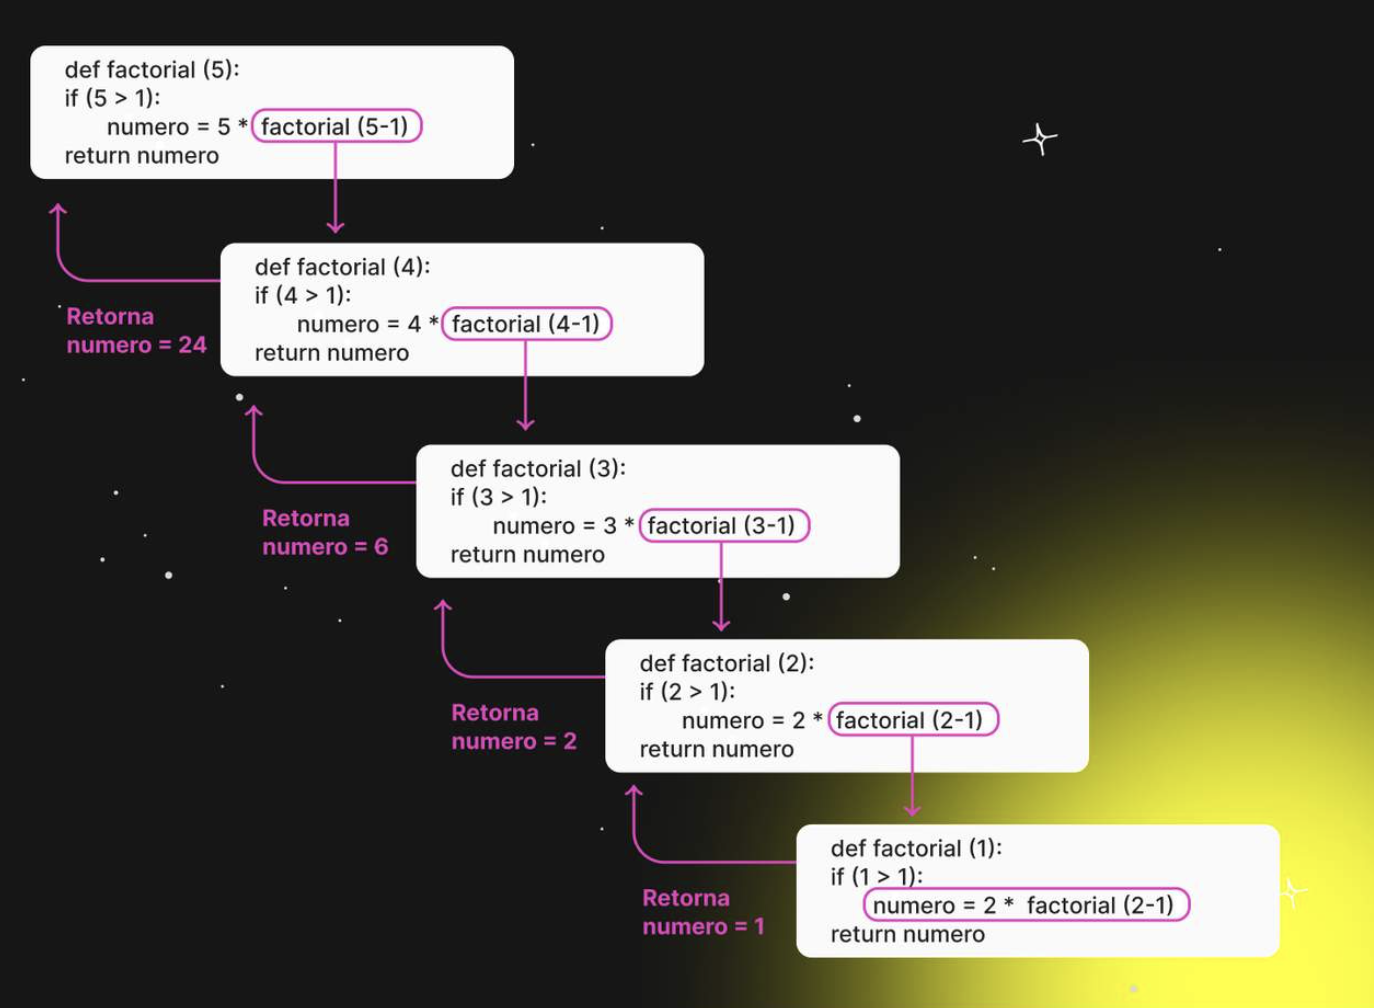

**¿Saben que es el factorial?**
- Es la multiplicación del numero pasado por todos los numeros anterioriores hasta llegar a 1
- Ejemplo: el factorial de 5 es igual a: 5 * 4 * 3 * 2 * 1

In [ ]:
5 * 4 * 3 * 2 * 1

120

In [ ]:
def factorial(numero):
    if (numero > 1):
        numero = numero * factorial(numero - 1)
    return numero

In [ ]:
factorial(5)

120

#### Otro ejemplo: La secuencia de fibonacci: 

- 0,1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597...
- La sucesión comienza con dos números naturales (dependiendo de la referencia, con 0 y 1 en ciertos casos, otras inician con 1 y 1) y a partir de estos, «cada término es la suma de los dos anteriores», es la relación de recurrencia que la define.

In [ ]:
def fibonacci(numero):
    if numero <= 1:
        return numero 
    else:
        return fibonacci(numero - 1) + fibonacci(numero - 2)

In [ ]:
resultado = fibonacci(6) # Sería preguntar por el 7° numero de la secuencia de fibonacci
resultado

8

### Pasajes de parámetros por valor y referencia 

- Como regla general: En Python los tipos de datos simples se pasan como valor (int, float, string, bool, complex), los demás tipos de datos, se pasan como referencia.

In [ ]:
# Ejemplo de pasaje como valor. NO se afecta el contenido de la referencia en memoría (variable)
def modificar_valor(x):
    x = 10
    print(x)

cosa = "Perro"
print(cosa) # Perro
modificar_valor(cosa) # 10
print(cosa) # Perro

Perro
10
Perro


**El valor de la variable global número no se modifica dado que Python pasa a la función una copia de la variable número. Pasa como valor.**

- Si quisiera pasar como referencia una variable de tipo de int necesito hacer esto: 

In [ ]:
def modificar_valor_2(x):
    x = 10
    print(x)
    return x 

numero = 5
print(numero)
numero = modificar_valor_2(numero)
print(numero)

5
10
10


In [ ]:
# Ejemplo de pasaje como referencia para estructuras de datos (objetos mutables)
def modificar_lista(lista):
    lista.append(4)

mi_lista = [1,2,3]
print(mi_lista) # [1, 2, 3]
modificar_lista(mi_lista) 
print(mi_lista) # [1, 2, 3, 4]

[1, 2, 3]
[1, 2, 3, 4]


**¿Como pasar una lista y que no se modifique en el scope global?**

- Para pasar como valor una lista puedo usar el método .copy()

In [ ]:
# Ejemplo de pasaje como referencia para estructuras de datos (objetos mutables)
def modificar_lista(lista):
    lista.append(4) # Expresión 1
    print(f'lista en scope de función {lista}') # Expresión 2

mi_lista = [1,2,3]
print(f'lista original en scope global {mi_lista}')
mi_lista_copia = mi_lista.copy()
modificar_lista(mi_lista_copia)
print(f'lista post función en scope global - sin modificación por pasar copia - {mi_lista}')
print(mi_lista_copia)

lista original en scope global [1, 2, 3]
lista en scope de función [1, 2, 3, 4]
lista post función en scope global - sin modificación por pasar copia - [1, 2, 3]
[1, 2, 3, 4]


### Funciones Lambda o funciones anónimas

- A diferencia de las funciones regulares, las funciones Lambda pueden tener cualquier cantidad de argumentos, pero solo una expresión. Además, no necesitan un return, ya que la expresión es el valor de retorno.

In [ ]:
# lambda cuadrado
calcular_cuadrado = lambda x: x ** 2

In [ ]:
def calcular_cuadrado2(x):
    return x ** 2

In [ ]:
calcular_cuadrado(9)

81

In [ ]:
calcular_cuadrado2(9)

81

In [ ]:
calcular_cuadrado(4)

16

In [ ]:
# lambda suma de elementos
suma_elementos = lambda x, y, z: x + y + z

In [ ]:
suma_elementos(3,5,10)

18

In [ ]:
suma_elementos("Hola"," ","Mundo!!!")

'Hola Mundo!!!'

In [ ]:
suma_elementos = lambda *args: sum(*args) # *args implica que la función recibirá una estructura de datos como argumento

In [ ]:
def suma_elementos2(*args):
    return sum(*args)

In [ ]:
suma_elementos([1,2,3,4,5,6,6,10,2,4,5,3,2,7,5,3])

68

In [ ]:
suma_elementos2([1,2,3,4,5,6,6,10,2,4,5,3,2,7,5,3])

68

In [ ]:
suma_elementos([1,45,76])

122

In [ ]:
list(range(1,100))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [ ]:
suma_elementos(list(range(1,100)))

4950

In [48]:
def calcular_cuadrado(x):
    return x ** 2

In [52]:
numeros = [1,2,3,4,5,6,7,8,9,10]

In [53]:
list(map(calcular_cuadrado, numeros))

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [54]:
list(map(lambda x: x ** 2, numeros))

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [ ]:
# map es una función que mapea un iterable y le aplica la misma lógica a todos lo elementos
numeros = [1,2,3,4,5,6]
list(map(lambda x: x ** 2, numeros))

[1, 4, 9, 16, 25, 36]

In [38]:
list(map(calcular_cuadrado, numeros))

[1, 4, 9, 16, 25, 36]

In [40]:
list(map(calcular_cuadrado, numeros))

[1, 4, 9, 16, 25, 36]

In [55]:
def filtrar_mayores_o_iguales_a_4(x):
    return x >= 4

In [56]:
numeros

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [59]:
lista_filtrada = list(filter(filtrar_mayores_o_iguales_a_4, numeros))
lista_filtrada

[4, 5, 6, 7, 8, 9, 10]

In [60]:
lista_filtrada2 = list(filter(lambda x: x >= 4, numeros))
lista_filtrada2

[4, 5, 6, 7, 8, 9, 10]

In [61]:
# reduce es una función que reduce un iterable a un solo valor
from functools import reduce
numeros = [1,2,3,4,5,6]
reduce(lambda x, y: x + y, numeros) # Reduce a la suma de sus componentes

21

### Function Help()

In [41]:
# Ya hablamos desde el primer encuentro de la misma. Nos permite obtener info detallada de las capacidades de un objeto o función
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, iterable[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence
    or iterable, from left to right, so as to reduce the iterable to a single
    value.  For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the iterable in the calculation, and serves as a default when the
    iterable is empty.



In [42]:
import functools
help(functools)

Help on module functools:

NAME
    functools - functools.py - Tools for working with functions and callable objects

CLASSES
    builtins.object
        cached_property
        partial
        partialmethod
        singledispatchmethod
    
    class cached_property(builtins.object)
     |  cached_property(func)
     |  
     |  Methods defined here:
     |  
     |  __get__(self, instance, owner=None)
     |  
     |  __init__(self, func)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  __set_name__(self, owner, name)
     |  
     |  ----------------------------------------------------------------------
     |  Class methods defined here:
     |  
     |  __class_getitem__ = GenericAlias(...)
     |      Represent a PEP 585 generic type
     |      
     |      E.g. for t = list[int], t.__origin__ is list and t.__args__ is (int,).
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptor

In [46]:
help("class")

Class definitions
*****************

A class definition defines a class object (see section The standard
type hierarchy):

   classdef    ::= [decorators] "class" classname [inheritance] ":" suite
   inheritance ::= "(" [argument_list] ")"
   classname   ::= identifier

A class definition is an executable statement.  The inheritance list
usually gives a list of base classes (see Metaclasses for more
advanced uses), so each item in the list should evaluate to a class
object which allows subclassing.  Classes without an inheritance list
inherit, by default, from the base class "object"; hence,

   class Foo:
       pass

is equivalent to

   class Foo(object):
       pass

The class’s suite is then executed in a new execution frame (see
Naming and binding), using a newly created local namespace and the
original global namespace. (Usually, the suite contains mostly
function definitions.)  When the class’s suite finishes execution, its
execution frame is discarded but its local namespace i

## Excepciones

- Los errores son problemas que ocurren cuando el intérprete de Python no puede entender el código que le has dado. Por otro lado, las excepciones son eventos inesperados que ocurren durante la ejecución del programa y pueden ser manejados mediante el uso de bloques try y except. 
- Ejemplos de errores: de sintaxis (falta cerrar un parentesis), en tiempo de ejecución (división sobre cero o acceder a un indice que no existe).
- Las excepciones son eventos que ocurren durante la ejecución de un programa y que interrumpen su flujo normal. Python utiliza un mecanismo de manejo de excepciones que permite al programador controlar cómo se manejan estos eventos inesperados. Esto se logra mediante el uso de bloques try, except, else y finally: 
- Ejemplo de excepciones: 

In [43]:
# Excepción en afirmación de testeo usando Assert: 
def calcular_raiz_cuadrada(numero):
    return numero ** 1/2 # Acá está el error. ¿Cual es? 

raiz_nueve = calcular_raiz_cuadrada(9)

assert raiz_nueve == 3

AssertionError: 

In [63]:
10/0
print("Hola Mundo!")

ZeroDivisionError: division by zero

In [62]:
# Manejo de errores y excepciones en Python
try:
    resultado = 10/0
    print(f'El resultado es: {resultado}')
except Exception as e:
    print(f'Excepción: {e}')
else:
    print("La división fue exitosa")
finally:
    nombre = input("Cual es su nombre?")
    print(nombre)
    print("Finalizando programa!!!")

Excepción: division by zero
dfas
Finalizando programa!!!


In [45]:
resultado = 10/0
print(f'El resultado es: {resultado}')
nombre = input("Cual es su nombre?")
print(nombre)

ZeroDivisionError: division by zero

In [55]:
# Manejo de errores y excepciones en Python
try:
    resultado = 10/2
    print(f'El resultado es: {resultado}')
except Exception as e:
    print(f'Excepción: {e}')
else:
    print("La división fue exitosa")
finally:
    print("Finalizando programa!!!")

El resultado es: 5.0
La división fue exitosa
Finalizando programa!!!


- No es necesario utilizar todos los bloques try, except, else y finally a la vez. Puedes utilizar solo aquellos que se adapten a tus necesidades específicas en un determinado contexto.
- Los unicos obligatorios desde un punto de vista funcional en un bloque except son el try y el except. Sin except el try funciona con un finally pero no tiene sentido dado que el programa se interrumpe y no estamos manejando la excepción correctamente.

In [49]:
# Manejo de errores y excepciones en Python
try:
    resultado = 10/0
    print(f'El resultado es: {resultado}')
finally:
    print("Terminando Programa!!!")

Terminando Programa!!!


ZeroDivisionError: division by zero

**Puedo abrir el manejo de excepciones para manejar distintas causisticas. Ejemplo:**

In [65]:
try:
    edad = int(input("Ingrese su edad: "))
    if edad > 18:
        edad / 0
    else:
        print(f'Su edad es: {edad}')
except ValueError as e:
    print(f'Excepcion: {e}')
    print("Ingrese un número")
except ZeroDivisionError as e:
    print(f'Exception: {e}')
    print("No puede dividir sobre cero")
except Exception as e:
    print(e)
finally:
    print("Fin del programa!")

Excepcion: invalid literal for int() with base 10: 'Mariano'
Ingrese un número
Fin del programa!


### Lanzamiento de nuestras propias excepciones. Uso de "raise"

In [55]:
x = -1
if x < 0:
    raise ValueError("El valor de 'x' debe ser mayor a 1")
else:
    print("Valor ingresado de forma correcta!")

ValueError: El valor de 'x' debe ser mayor a 1

### Cracion de nuestras propias excepciones. POO, Herencia de Excepcion

In [57]:
class ProductoAgotadoExcepcion(Exception):
    pass

In [58]:
def comprar_producto(producto, cantidad_disponible):
    if cantidad_disponible <= 0:
        raise ProductoAgotadoExcepcion("Lo siento, este producto está agotado")
    else:
        print("Producto comprado exitosamente")

In [59]:
comprar_producto("Campera", 0)

ProductoAgotadoExcepcion: Lo siento, este producto está agotado

In [60]:
try:
    comprar_producto("Campera", 0)
except ProductoAgotadoExcepcion as e:
    print(e)

Lo siento, este producto está agotado


## Funciones de orden superior

- Las funciones de orden superior son aquellas que pueden aceptar otras funciones como argumentos y/o devolver funciones como resultado. En Python, las funciones son consideradas ciudadanos de primera clase, lo que significa que pueden ser tratadas como cualquier otro objeto, como enteros, cadenas o listas.
- Map, Filter, Reduce serían ejemplos de funciones de orden superior, dado que necesiaramente como argumento deben recibir una función para aplicar a un iterable mutable.

**Ejemplo 1:**

In [70]:
def aplicar_funcion(func, x):
    return func(x)

In [71]:
def cuadrado(numero):
    return numero ** 2

In [72]:
resultado = aplicar_funcion(cuadrado, 5)
print(resultado)

25


**Ejemplo 2:**

In [74]:
# Al pasar distintas lambdas logro un nivel de abstracción más elevado. Por lo que la función cumple más casos de usos (sumas, restas, etc):
def operar(func, a, b):
    return func(a, b)

resultado_suma = operar(lambda x, y: x + y, 5, 3)
print(resultado_suma)

resultado_resta = operar(lambda x, y: x - y, 10, 7)
print(resultado_resta)

8
3


**Ejemplo 3: Replicamos map() nosotros mismos**

In [78]:
def map2(funcion, lista):
    resultados = []
    for elemento in lista:
        resultados.append(funcion(elemento))
    return resultados

def caudrado(numero):
    return numero ** 2

numeros = [1,2,3,4,5,6,7,8,9]
resultado = map2(cuadrado, numeros)
print(resultado)

resultado2 = list(map(cuadrado, numeros))
print(resultado2)

[1, 4, 9, 16, 25, 36, 49, 64, 81]
[1, 4, 9, 16, 25, 36, 49, 64, 81]


In [82]:
# Replicamos filter ahora

def filter2(funcion, lista):
    resultados = []
    for elemento in lista:
        if funcion(elemento):
            resultados.append(elemento)
    return resultados

def distintos_de_cero(numero):
    return numero != 0

numeros = [0,1,2,0,4,2,1,0,0,5,0,6,9,8,0,1,2,0,1,7,6]
resultado = filter2(distintos_de_cero, numeros)
print(resultado)

resultado2 = list(filter(distintos_de_cero, numeros))
print(resultado2)

[1, 2, 4, 2, 1, 5, 6, 9, 8, 1, 2, 1, 7, 6]
[1, 2, 4, 2, 1, 5, 6, 9, 8, 1, 2, 1, 7, 6]
